# Social Media Analytics
## School of Information, University of Michigan

## Week 2: Visualizing and Modeling Patterns in Social Media Data
 
- Obtaining, loading, and overview of a large corpus
- Visualizing a tweet corpus temporally

## Assignment Overview
### The objective of this assignment is to:

- Process a large corpus of data from twitter
- Visualize the corpus temporally

### The total score of this assignment will be 100 points consisting of:

- `create_tweet_df` function: 5 points
- `create_tweet_count_df` function: 5 points
- `create_favorite_avg_df` function: 5 points
- `create_retweet_avg_df` function: 5 points
- `create_tweet_sum_viz` function: 10 points
- observations related to `create_tweet_sum_viz` function: 5 points
- `create_hashtag_df` function: 10 points
- `most_used_hashtags` function: 15 points
- `create_hashtag_viz` function: 15 points
- observations related to `create_hashtag_viz` function: 5 points
- `create_seasonal_decompose_plot` function: 15 points
- observations related to `create_seasonal_decompose_plot` function: 5 points

### Resources:

- [Tweepy API documentation](https://tweepy.readthedocs.io/en/latest/) 
- [Trump tweet corpus](https://www.thetrumparchive.com/) 

## Instructions: 

In this assignment, you will continue to use a Twitter corpus we provide to you. You will process the data and create temporal visualizations of the corpus. For each visualization, you will record observations about these data and their renderings. 

**Note:** Throughout many functions in this assignment, the [Pandas resample function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) is incredibly useful; it obviates many issues related to types and binning that could be introduced by other Pandas approaches.

**Note:** In previewing your data with print() statements, be mindful that displaying too much data can be problematic within any Jupyter Notebook environment.  If you are seeing an error message saying something like "data rate exceeded" when running a cell, it is likely caused by using print() for too large of a data set and we would suggest printing only a sample of the data instead.

In [1]:
import json
import os
import pandas as pd

def create_tweet_df():
    """
    5 points
    Use all the json files in the folder assets/trump_data_archive/
    The dataframe must have the following columns:
        'retweet_count', int
        'created_at', datetime
        'text', object
        'favorited', bool
        'retweeted', bool
        'lang', object
        'favorite_count', int 
        
    Note that some time in 2017, Twitter seems to have switched from suppling the 
    'text' field to the 'full_text' field. This kind of thing happens when you're dealing
    with data supplied by someone else.
    In your dataframe, make sure 'text' column has data from either 'text' or 'full_text', whichever
    is present. Otherwise, when you compute counts later on in this assignment, you will find that
    the counts are all 0 after a certain date.
    """
    use_cols = ["retweet_count", "created_at", "text", "favorited", "retweeted", "lang", "favorite_count"]
    all_data = []
    for file in sorted(os.listdir("assets/trump_data_archive")):
        if file.endswith("json"):
            df = pd.read_json(os.path.join("assets", "trump_data_archive", file))
            if "full_text" in df.columns:
                df.loc[df["full_text"].isna(), "full_text"] = df.loc[df["full_text"].isna(), "text"]
                df = df.drop(columns="text").rename(columns={"full_text":"text"})
            df = df[use_cols]
            all_data.append(df)
            
    tweets_df = pd.concat(all_data, axis=0)
    return tweets_df

df = create_tweet_df()
df

,retweet_count,created_at,text,favorited,retweeted,lang,favorite_count
0,28,2009-12-23 17:38:18+00:00,From Donald Trump: Wishing everyone a wonderfu...,False,False,en,12
1,33,2009-12-03 19:39:09+00:00,Trump International Tower in Chicago ranked 6t...,False,False,en,6
2,13,2009-11-26 19:55:38+00:00,Wishing you and yours a very Happy and Bountif...,False,False,en,11
3,5,2009-11-16 21:06:10+00:00,Donald Trump Partners with TV1 on New Reality ...,False,False,en,3
4,7,2009-11-02 14:57:56+00:00,"--Work has begun, ahead of schedule, to build ...",False,False,en,6
...,...,...,...,...,...,...,...
2600,6847,2017-01-01 06:49:33+00:00,RT @DonaldJTrumpJr: Happy new year everyone. #...,False,False,en,0
2601,6941,2017-01-01 05:44:17+00:00,RT @EricTrump: 2016 was such an incredible yea...,False,False,en,0
2602,7144,2017-01-01 05:43:23+00:00,RT @Reince: Happy New Year + God's blessings t...,False,False,en,0
2603,5548,2017-01-01 05:39:13+00:00,RT @DanScavino: On behalf of our next #POTUS &...,False,False,en,0


In [2]:
import json
import pandas as pd
import os
import numpy as np

df = create_tweet_df()
df_length = 32797
assert len(df) == df_length, "create_tweet_df, the length of the dataframe should be %d" % df_length
df_cols = ['retweet_count', 'created_at','favorited','text', 'favorite_count','retweeted','lang']
for col_name in df_cols:
    assert col_name in df.columns.values, "create_tweet_df, the column %s should be included" % col_name

## Using the functions below, you will be recreating the visualizations displayed here:
<img src="assets/example_plot_2.png" alt="three bar charts plotting tweet count, average number of favorites, and average number of retweets over time" style="width: 1000px;"/>

In [3]:
df.set_index("created_at").resample("m")["favorite_count"].agg(["mean"]).reset_index().rename(columns={"mean":"favorite avg"})

,created_at,favorite avg
0,2009-05-31 00:00:00+00:00,115.142857
1,2009-06-30 00:00:00+00:00,14.818182
2,2009-07-31 00:00:00+00:00,8.200000
3,2009-08-31 00:00:00+00:00,8.285714
4,2009-09-30 00:00:00+00:00,22.000000
...,...,...
100,2017-09-30 00:00:00+00:00,63093.983660
101,2017-10-31 00:00:00+00:00,66643.286207
102,2017-11-30 00:00:00+00:00,73557.272031
103,2017-12-31 00:00:00+00:00,82282.889447


In [4]:
import pandas as pd

# 15 points if you pass the tests for all three of these functions

def create_tweet_count_df(tweets_df):
    """ 
    Create a dataframe with the count of tweets each month
    The dataframe must have the following columns:
        'count', int, the number of tweets created each month
        'created_at', datetime, the date at which tweets were created
    See tests in the next cell to see what the first row should contain.
    HINT: see note at top of notebook
    """
    return df.set_index("created_at").resample("m")["text"].agg(["count"]).reset_index()

def create_favorite_avg_df(tweets_df):
    """ 
    Create a dataframe with the average of favorites of tweets created each month
    The dataframe must have the following columns:
        'favorite avg', int, the average of favorites of all of the tweets created each month
        'created_at', datetime, the date at which tweets were created
    HINT: see note at top of notebook
    """
    return df.set_index("created_at").resample("m")["favorite_count"].agg(["mean"]).reset_index().rename(columns={"mean":"favorite avg"})

def create_retweet_avg_df(tweets_df):
    """ 
    Create a dataframe with the average of retweets of the tweets created each month
    The dataframe must have the following columns:
        'retweet avg', int, the average of retweets of all of the tweets created each month
        'created_at', datetime, the date at which tweets were created
    HINT: see note at top of notebook
    """
    return df.set_index("created_at").resample("m")["retweet_count"].agg(["mean"]).reset_index().rename(columns={"mean":"retweet avg"})

In [5]:
import json
import pandas as pd
import os
import datetime

t_df = create_tweet_df()
t_count = create_tweet_count_df(t_df)

# check that the first row of t_count is for "2009-05-31 00:00:00+00:00" with count of 21
assert t_count.loc[0,'created_at'].date() == datetime.date(2009, 5, 31)
assert t_count.loc[0,'count'] == 21

t_fav = create_favorite_avg_df(t_df)
t_rt = create_retweet_avg_df(t_df)

df_length = 105
assert len(t_count) == df_length, "create_tweet_count_df, the length of the dataframe should be %d" % df_length
assert len(t_fav) == df_length, "create_favorite_avg_df, the length of the dataframe should be %d" % df_length
assert len(t_rt) == df_length, "create_retweet_avg_df, the length of the dataframe should be %d" % df_length

for tup in [(t_count, "create_tweet_count_df"), (t_fav, "create_favorite_avg_df"), (t_rt, "create_retweet_avg_df")]:
    assert 'created_at' in tup[0].columns.values, "%s, the column created_at should be included" % tup[1]

assert 'count' in t_count.columns.values, "create_tweet_count_df, the column count should be included"
assert 'favorite avg' in t_fav.columns.values, "create_favorite_avg_df, the column favorite avg should be included"
assert 'retweet avg' in t_rt.columns.values, "create_retweet_avg_df, the column retweet avg should be included"


In [6]:
import pandas as pd
import altair as alt 
import json
import os
import pandas as pd

def create_tweet_sum_viz(t_count,t_rt,t_fav):
    """
    10 points
    Create the visualization shown above
    Use the tweet_df dataframe
    """
    
    chart1 = alt.Chart(data=t_count).encode(x="created_at", y="count").mark_bar()
    chart2 = alt.Chart(data=t_fav).encode(x="created_at", y="favorite avg").mark_bar()
    chart3 = alt.Chart(data=t_rt).encode(x="created_at", y="retweet avg").mark_bar()
    chart = chart1 | chart2 | chart3
    
    display(chart)

df = create_tweet_df()
t_count = create_tweet_count_df(t_df)
t_fav = create_favorite_avg_df(t_df)
t_rt = create_retweet_avg_df(t_df)
create_tweet_sum_viz(t_count,t_rt,t_fav)

alt.HConcatChart(...)

In [7]:
#json.load(open(filepath).read())

Looking at the graphs you have produced, please make observations about the tweet frequency and popularity of the former president in the cell below. (5 points)

The former president tweeted a lot around 2012, during the Obama Administration, then there was a pause, and then he tweeted more around 2015, before becoming president when he was campaigning, and tweeted less after becoming president, in 2017. He was tweeting less in 2017, but getting more retweets after he became president. His average was going up, but his tweet count was doing down. 

In [8]:
df.dtypes

retweet_count                   int64
created_at        datetime64[ns, UTC]
text                           object
favorited                        bool
retweeted                        bool
lang                           object
favorite_count                  int64
dtype: object

In [9]:
import json
import os
import pandas as pd

def create_hashtag_df():
    """ 
    10 points
    Use the json files on the folder assets/trump_data_archive/
    The dataframe must have the following columns:
        'text', string, the text of the hashtag
        'created_at', datetime, the time the hashtag was tweeted
        
    If there is more than one hashtag for a single tweet, create one row in the
    dataframe for each hashtag, with the same 'created_at' timestamp for all of them.
    
    HINT: use the 'hashtags' attribute in the 'entities' attribute of the tweets
    """ 
    all_data = []
    for file in sorted(os.listdir("assets/trump_data_archive")):
        if file.endswith("json"):
            filepath = os.path.join("assets", "trump_data_archive", file)
            data = json.load(open(filepath))
            for tweet in data:
                created_at = tweet["created_at"]
                for tag in tweet.get("entities", {}).get('hashtags', []):
                    all_data.append([created_at, tag["text"]])

    df = pd.DataFrame(all_data, columns=["created_at", "text"])
    df["created_at"] = pd.to_datetime(df["created_at"])
    return df

In [10]:
import json
import pandas as pd
import os

df = create_hashtag_df()
df_length = 6650
assert len(df) == df_length, "create_hashtag_df, the length of the dataframe should be %d" % df_length
df_cols = ['text','created_at']
for col_name in df_cols:
    assert col_name in df.columns.values, "create_hashtag_df, the column %s should be included" % col_name
df_pairs = 6638
assert len(df[df_cols].drop_duplicates()) == df_pairs, "create_hashtag_df, incorrect number of hashtag-timestamp pairs, should be %d" % df_pairs


In [11]:
df.dtypes

created_at    datetime64[ns, UTC]
text                       object
dtype: object

In [12]:
import pandas as pd

def most_used_hashtags(n, hashtag_df):
    """
    15 points
    Create a dataframe with the n most used hashtags overall and how many times they were used each month
    The dataframe must have the following columns:
        'hashtag', string, the text of the hastag
        'created_at', datetime, the time the hashtag was tweeted
        'count', int, the times the hastag was used each month
    HINT: see note at top of notebook
    """
    top_df = pd.DataFrame()
    df = hashtag_df
    most_used = df.groupby(by=['text']).count().reset_index()
    most_used_list = most_used.sort_values(by=['created_at'], ascending=False).head(n)['text'].tolist()
    df_filtered = df[df['text'].isin(most_used_list)].set_index('created_at')
    df_filtered.index = pd.to_datetime(df_filtered.index)
    top_df = df_filtered.groupby('text').resample('M').count()
    top_df = top_df.rename(columns={'text':'count'}).reset_index()
    top_df = top_df.rename(columns={'text':'hashtag'})
    return top_df

In [13]:
import json
import pandas as pd
import os

df = create_hashtag_df()
m_df = most_used_hashtags(10, df)
df_length = 320
assert len(m_df) == df_length, "most_used_hashtags, the length of the dataframe should be %d" % df_length
df_cols = ['count','hashtag','created_at']
for col_name in df_cols:
    assert col_name in m_df.columns.values, "most_used_hashtags, the column %s should be included" % col_name

In [14]:
m_df

,hashtag,created_at,count
0,AmericaFirst,2016-06-30 00:00:00+00:00,17
1,AmericaFirst,2016-07-31 00:00:00+00:00,18
2,AmericaFirst,2016-08-31 00:00:00+00:00,10
3,AmericaFirst,2016-09-30 00:00:00+00:00,30
4,AmericaFirst,2016-10-31 00:00:00+00:00,7
...,...,...,...
315,VoteTrump,2016-07-31 00:00:00+00:00,0
316,VoteTrump,2016-08-31 00:00:00+00:00,1
317,VoteTrump,2016-09-30 00:00:00+00:00,3
318,VoteTrump,2016-10-31 00:00:00+00:00,0


### Create the following visualization (15 points) and write any observations about the plot (5 points).
<img src="assets/example_plot_1.png" alt="Drawing" style="width: 500px;"/>

In [15]:
import pandas as pd
import altair as alt 
import json
import os
import pandas as pd

def create_hashtag_viz(most_used_hashtags):
    """
    15 points
    Create the visualization shown above using the top 10 hashtags
    Use the most_used_hashtags dataframe
    """
    
    chart = alt.Chart(m_df.rename(columns={"text":"hashtag"})).mark_line().encode(x="created_at", y="count", color="hashtag")
    return chart

df = create_hashtag_df()
m_df = most_used_hashtags(10, df)
create_hashtag_viz(m_df)

alt.Chart(...)

It seems that 'CelebApprentice' was the most popular, when the show was popular and right when Trump started to campaign for presidency. The hashtags 'Trump2016' and 'MakeAmericaGreatAgain' seemed to be pretty well for about a year, until he became president in 2017. After he became president, all hashtags except 'DrainTheSwamp'(which barely lasted) pretty much went downhill or were almost nonexistent. The hashtag 'Trump" never really took off the whole time from 2012 to 2017. 

### Create the following visualization (15 points) and write any observations about the plot (5 points) relating to the seasonal decomposition of tweet count.
<img src="assets/example_plot_3_a.png" alt="Drawing" style="width: 500px;"/>
<img src="assets/example_plot_3_b.png" alt="Drawing" style="width: 500px;"/>

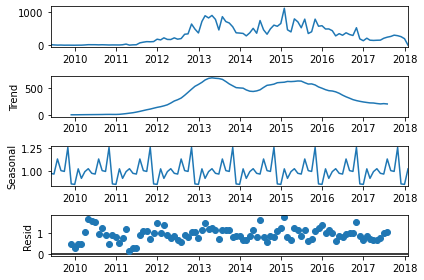

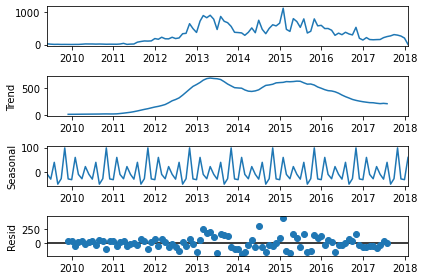

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def create_seasonal_decompose_plot(t_count):
    """
    15 points
    Create a visualization for the seasonal decomposition of the twitter count series
    Create a plot for a decomposition using a multiplicative and a plot for a decomposition using an additive model
    Use the seasonal_decompose function of statsmodels.tsa.seasonal to decompose and the plot
    method of the resulting object
    """
s = t_count.set_index('created_at')

seasonal_decompose(s, model='multiplicative').plot()
seasonal_decompose(s, model='additive').plot()
plt.show()

I think when the seasonal variation is pretty stable over a period of time, the additive model is useful. And I think when the seasonal variation is increasing over a period of time, the multiplicative model is useful. The seasonal multiplicative model is not increasing, it seems to be pretty much the same every year, so might not be very useful. The seasonal additive model is pretty stable and smilimar every year, so seems to be very useful.  